Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

Importing the dataset

In [2]:
df=pd.read_csv("Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


Understanding the DataSet & Data Pre-processing

In [3]:
df.shape #to understand the size of the dataset

(400, 9)

In [4]:
df.drop('Serial No.',axis=1,inplace=True) #removing irrelevant data
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
df.shape

(400, 8)

In [6]:
df.info() #to get an idea about the datatype of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [7]:
df.columns #to get the coloumn heading

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
df.head() #get detail of first 5 row

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.tail() # last 5

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


In [11]:
df.isnull().sum() #no null value thus the sum is 0

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


Skewness s the measure of the lack of symmetry, and its types are distinguished by the side on which the tail of probability distribution lies.
>0 --> Positive skew
<0 --> Negative Skew



In [12]:
df.iloc[:,:-1].skew()

,0
GRE Score,-0.062893
TOEFL Score,0.057216
University Rating,0.171260
SOP,-0.275761
LOR,-0.106991
CGPA,-0.065991
Research,-0.191582


In [13]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<Axes: >

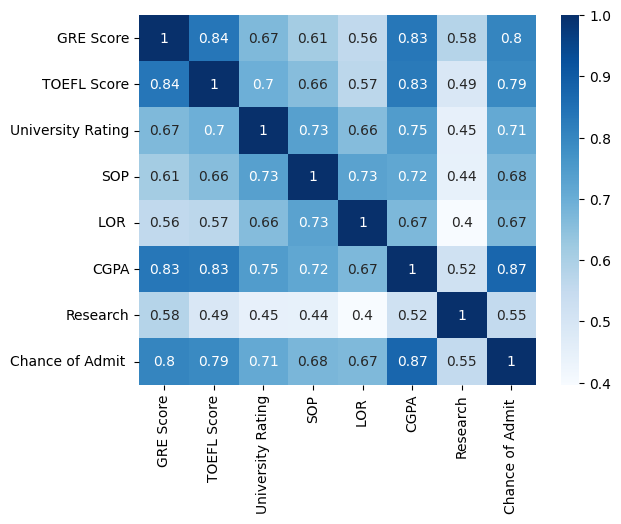

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='Blues') #seaborn's heatmap to visualise data

In [15]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Data Visualization

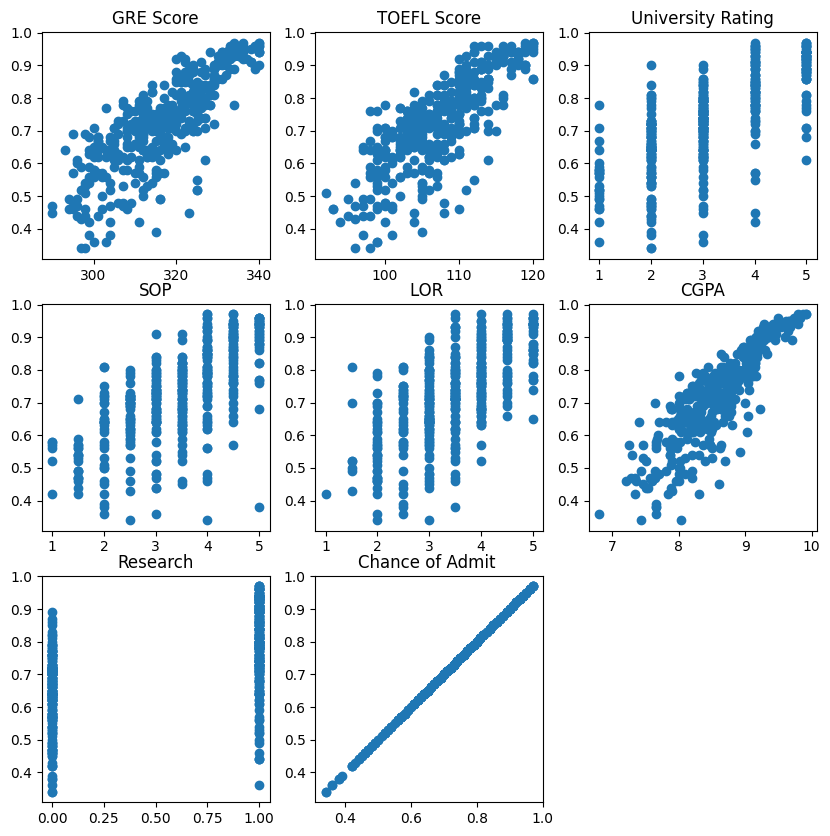

In [16]:
plt.figure(figsize=(10,10))
i=331;
for z in df:
    plt.subplot(i)
    i=i+1
    plt.scatter(df[z],df['Chance of Admit '])
    plt.title(z)

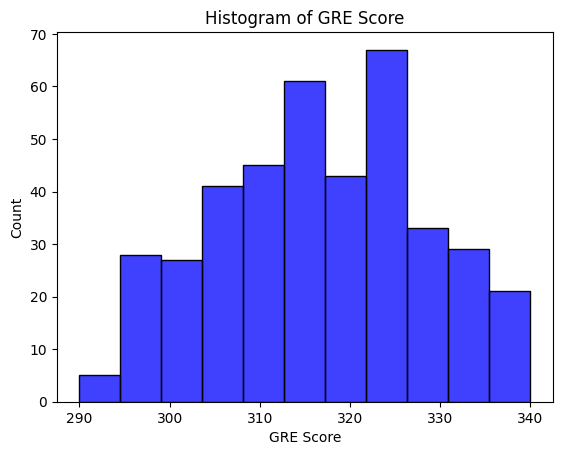

In [17]:
sns.histplot(df['GRE Score'],color='Blue')
plt.title('Histogram of GRE Score')
plt.show()

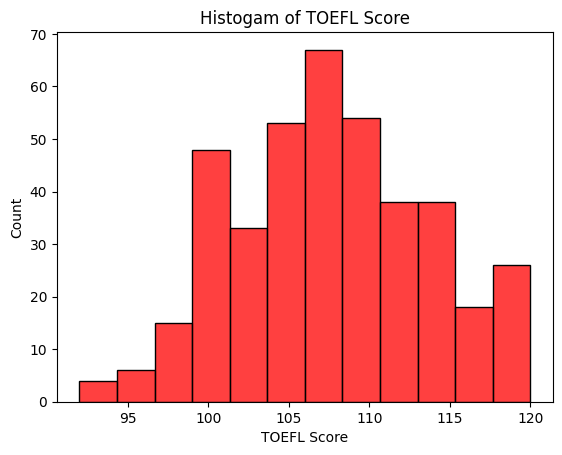

In [18]:
sns.histplot(df['TOEFL Score'],color='Red')
plt.title('Histogam of TOEFL Score')
plt.show()

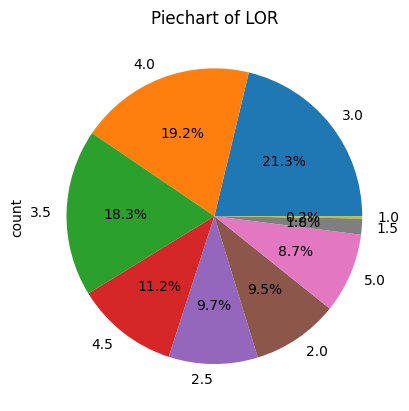

In [19]:
df['LOR '].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title('Piechart of LOR')
plt.show()

Boxplots are useful for visualizing the distribution, central tendency, and variability of the data in each column.

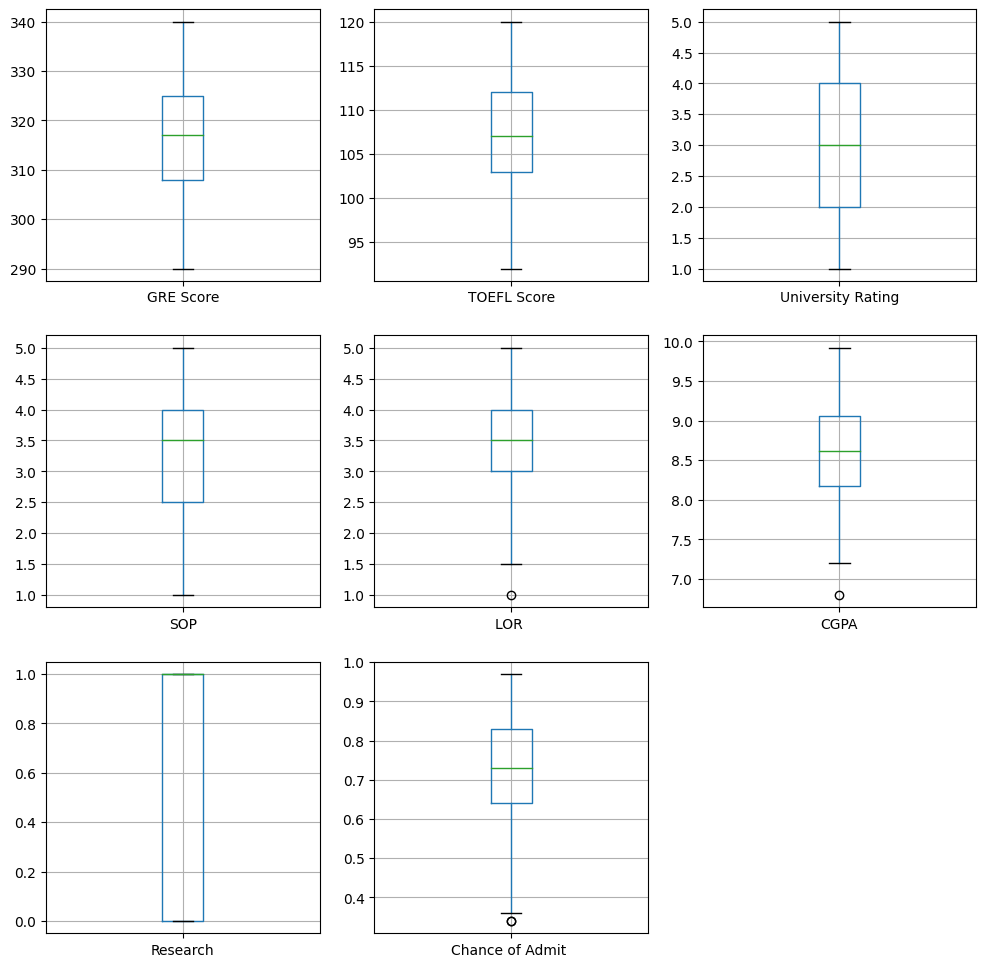

In [20]:
plt.figure(figsize=(12,12))
i=1
for col in df.iloc[:,:]:
    plt.subplot(3,3,i)
    df[[col]].boxplot()
    i+=1

Data Preparation

Label encoding is a technique used to convert categorical variables into numerical values.

In [21]:
from sklearn.preprocessing import LabelEncoder


# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame and apply label encoding
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# The dataset is now label encoded

Min-max scaling is a technique used to scale numerical features to a specific range, typically between 0 and 1

In [22]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
df=pd.DataFrame(ms.fit_transform(df),columns=df.columns)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.937500,0.928571,0.75,0.875,0.875,0.934132,1.0,0.915254
1,0.666667,0.535714,0.75,0.750,0.875,0.604790,1.0,0.644068
2,0.500000,0.428571,0.50,0.500,0.625,0.191617,1.0,0.576271
3,0.625000,0.642857,0.50,0.625,0.375,0.502994,1.0,0.711864
4,0.458333,0.392857,0.25,0.250,0.500,0.293413,0.0,0.457627
...,...,...,...,...,...,...,...,...
395,0.666667,0.642857,0.50,0.625,0.625,0.676647,1.0,0.745763
396,0.687500,0.535714,0.50,0.500,0.625,0.712575,1.0,0.779661
397,0.791667,0.857143,0.75,1.000,0.875,0.868263,1.0,0.898305
398,0.416667,0.392857,0.50,0.625,0.750,0.568862,0.0,0.491525


In [23]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [24]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.937500,0.928571,0.75,0.875,0.875,0.934132,1.0
1,0.666667,0.535714,0.75,0.750,0.875,0.604790,1.0
2,0.500000,0.428571,0.50,0.500,0.625,0.191617,1.0
3,0.625000,0.642857,0.50,0.625,0.375,0.502994,1.0
4,0.458333,0.392857,0.25,0.250,0.500,0.293413,0.0
...,...,...,...,...,...,...,...
395,0.666667,0.642857,0.50,0.625,0.625,0.676647,1.0
396,0.687500,0.535714,0.50,0.500,0.625,0.712575,1.0
397,0.791667,0.857143,0.75,1.000,0.875,0.868263,1.0
398,0.416667,0.392857,0.50,0.625,0.750,0.568862,0.0


In [25]:
y

,Chance of Admit
0,0.915254
1,0.644068
2,0.576271
3,0.711864
4,0.457627
5,0.881356
6,0.627119
7,0.508475
8,0.203390
9,0.118644


Splitting the data into training and testing sets.
20% of the data will be used for testing, while the remaining 80% will be used for training.

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 7), (80, 7), (320,), (80,))

**Logistic Regression Model**

The lr object will contain a trained linear regression model that can be used to make predictions on new data or evaluate its performance on the testing set.

In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
y_test #The corresponding testing set of target variables.

,Chance of Admit
398,0.491525
125,0.440678
328,0.711864
339,0.728814
172,0.813559
342,0.338983
197,0.593220
291,0.305085
29,0.271186
284,0.949153


In [29]:
y_pred= lr.predict(x_test)
y_pred #the predicted value is stored here

array([0.58439978, 0.52674134, 0.69718029, 0.67878349, 0.80671715,
       0.44563626, 0.43153686, 0.28996651, 0.2496955 , 0.93121707,
       0.73896134, 0.93751644, 0.85989276, 0.45311069, 0.58101709,
       0.51610285, 0.75006004, 0.83382308, 0.23935821, 0.52306348,
       0.48519351, 0.6826461 , 0.77599138, 0.91857249, 0.45573058,
       0.3073235 , 0.58041809, 0.55168629, 0.89465198, 0.4570529 ,
       0.97189987, 0.43176308, 0.70255535, 0.68706214, 0.56517795,
       0.4563202 , 0.22785105, 0.45785717, 0.89546962, 0.65059864,
       0.79033458, 0.50637716, 0.85929069, 0.44813782, 0.99675689,
       0.55808122, 0.59970699, 0.76003565, 0.42784475, 0.48274162,
       0.6898536 , 0.30355468, 0.72766513, 0.60210662, 0.55382852,
       0.87586709, 0.17974543, 0.28622803, 0.69057416, 0.68688514,
       0.93850614, 0.59035231, 0.84939881, 0.57903352, 0.27163781,
       0.67779324, 0.82050781, 0.63017016, 0.46332011, 0.70999835,
       0.73256558, 0.33190267, 0.54669326, 0.41903355, 0.77801

The R-squared (coefficient of determination) is a statistical measure that represents the proportion of variance in the dependent variable (target variable) that is explained by the independent variables (predictor variables) in a regression model. It is a measure of how well the model fits the observed data.
A value of 1 indicates that the model perfectly predicts the dependent variable based on the independent variables. A value of 0 indicates that the model does not explain any of the variance in the dependent variable.

In [30]:
from sklearn.metrics import r2_score
# Assuming you have already defined and trained your LinearRegression model
y_pred = lr.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.8060630460887068


**Decision Tree Classifier**

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create and fit the DecisionTreeClassifier model
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(x_train, y_train_encoded)

DecisionTreeClassifier(random_state=42)

In [32]:
y_pred=DT_model.predict(x_test)
y_pred

array([38, 45, 41, 34, 46, 25,  4,  8,  8, 56, 36, 55, 53, 33, 32, 17, 45,
       53,  9, 24, 33, 42, 51, 51, 23, 28, 35, 26, 55, 29, 55, 33, 46, 39,
       33, 23, 18, 40, 55, 40, 45, 25, 48, 25, 55, 32, 32, 40, 25, 18, 41,
       28, 43, 36, 32, 48,  9,  9, 48, 39, 55, 42, 50, 38, 11, 40, 45, 38,
       25, 42, 43,  1, 34, 25, 40,  8, 34, 29, 22, 34])

In [33]:
from sklearn.metrics import accuracy_score,classification_report

In [34]:
import numpy as np
# Convert continuous target variable into categorical values using binning
num_bins = 5
bins = np.linspace(y_train.min(), y_train.max(), num_bins)
y_train_categorical = np.digitize(y_train, bins)
y_test_categorical = np.digitize(y_test, bins)
# Create and fit the DecisionTreeClassifier model
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(x_train, y_train_categorical)
y_pred = DT_model.predict(x_test)
# Use regression metrics instead of classification metrics
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [35]:
mse #mean square error

5.440142918701523

In [36]:
# Convert the predicted categorical values back to continuous form
y_pred_continuous = bins[y_pred - 1]
# Calculate the accuracy
accuracy = 1 - mean_squared_error(y_test, y_pred_continuous)
# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9507733948577994
